## **문제 1)**
- 빵집에서는 매일 아침에 구워지는 식빵 한 개의 평균 무게가 500g이 되도록 맞추고자 합니다. 빵집 주인은 오늘 아침에 구운 식빵 중에서 랜덤하게 25개의 식빵을 샘플링하여 무게를 측정했습니다. 그 결과, 표본 평균은 495g, 표준편차는 10g으로 나왔습니다. 빵집 주인이 목표한 500g의 무게를 충족하고 있는지(다시말해 목표 무게를 넘는지 안 넘는지)  5% 유의수준에서 검정해보세요


In [ ]:
import numpy as np
import scipy.stats as stats

# 입력값 설정
sample_mean = 495
sample_std = 10
n = 25
mu_0 = 500  # 검정 대상인 모평균 (목표 무게)
alpha = 0.05

# 표준 오차 및 자유도 계산
standard_error = sample_std / np.sqrt(n)
df = n - 1

# t 통계량 계산
t_statistic = (sample_mean - mu_0) / standard_error

# 단측 또는 양측 검정: 여기선 양측 검정 (목표보다 "다른지" 확인)
p_value = stats.t.sf(np.abs(t_statistic), df=df) * 2  # 양측 검정이므로 * 2

# 결과 출력
if p_value < alpha:
    print(f"t-값: {t_statistic:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 빵의 평균 무게는 목표와 다릅니다.")
else:
    print(f"t-값: {t_statistic:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 빵의 평균 무게는 목표와 통계적으로 차이가 없습니다.")


t-값: -2.5000, p-value: 0.0197. 유의수준 0.05에서 귀무가설을 기각합니다. 빵의 평균 무게는 목표와 다릅니다.


## **문제 2)**
문제 1번을 바탕으로 분포를 그리고 t통계량을 빨간색 점선으로, 초록색 점선으로 임계값을 기각역을 초록색으로 칠해보세요.

***기각역**:  통계량이 들어왔을 경우 귀무가설을 기각할 수 있는 영역을 말합니다.

 Hint)

- `plt.axvline` : y축 평행선 그리기
- `plt.fill_between` : 그래프 면적 *색칠하기*

t-값: -2.5000, p-value: 0.0197. 유의수준 0.05에서 귀무가설을 기각합니다. 빵의 평균 무게는 목표와 다릅니다.


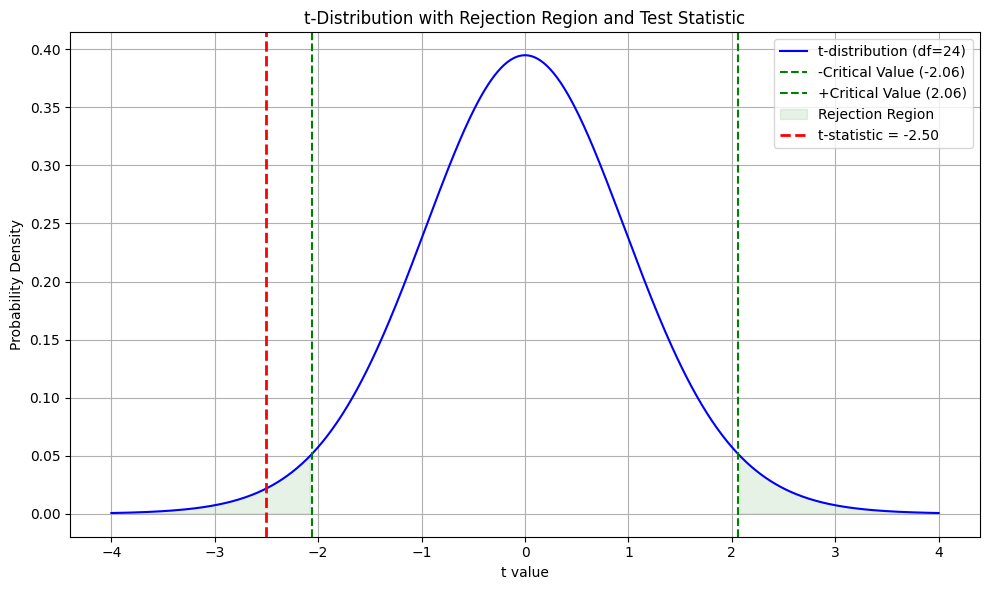

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# 입력값 설정
sample_mean = 495
sample_std = 10
n = 25
mu_0 = 500
alpha = 0.05

# 표준 오차 및 자유도 계산
standard_error = sample_std / np.sqrt(n)
df = n - 1

# t 통계량과 임계값 계산
t_statistic = (sample_mean - mu_0) / standard_error
t_critical = stats.t.ppf(1 - alpha/2, df)
p_value = stats.t.sf(np.abs(t_statistic), df=df) * 2

# 결과 출력
if p_value < alpha:
    print(f"t-값: {t_statistic:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 빵의 평균 무게는 목표와 다릅니다.")
else:
    print(f"t-값: {t_statistic:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 빵의 평균 무게는 목표와 통계적으로 차이가 없습니다.")

# t-분포 시각화
x = np.linspace(-4, 4, 500)
y = stats.t.pdf(x, df=df)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', label=f't-distribution (df={df})')

# 임계값 선
plt.axvline(x=-t_critical, color='green', linestyle='--', label=f'-Critical Value ({-t_critical:.2f})')
plt.axvline(x=t_critical, color='green', linestyle='--', label=f'+Critical Value ({t_critical:.2f})')

# 기각역 채우기
plt.fill_between(x, y, where=(x <= -t_critical) | (x >= t_critical), color='green', alpha=0.1, label='Rejection Region')

# t-통계량 선
plt.axvline(x=t_statistic, color='red', linestyle='--', linewidth=2, label=f't-statistic = {t_statistic:.2f}')

# 그래프 설정
plt.title('t-Distribution with Rejection Region and Test Statistic')
plt.xlabel('t value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## **문제 3) 단일 t 표본 검정**

- 어느 학교에서 새로운 교육 프로그램을 도입한 후 학생들의 수학 성적이 향상되었는지 확인하려고 합니다. 프로그램 도입 후 무작위로 선택한 16명의 학생들의 수학 성적 평균은 78점이고, 모집단의 평균은 75점입니다. 모집단의 표준편차는 알 수 없다고 합니다.
- 유의수준 0.05에서 이 교육 프로그램이 성적 향상에 *효과가* 있는지 단일 표본 t-검정을 실시하세요.

<aside>
💡

수업시간에 양측검정을 기준으로 배웠습니다. 다시말하면 데이터의 평균이 특정 값과 같은지 아닌지(방향은 관심없음)입니다. 문제는 **향상에 효과가 있는지** 에 대한 물음입니다. 함수를 무엇을 어떻게 넣어야할지 고민해보세요!(힌트 scipy docs 참고)

</aside>


In [ ]:
import numpy as np
from scipy import stats

# 데이터 입력
sample_scores = [79, 77, 80, 76, 78, 81, 75, 79, 77, 80, 78, 76, 82, 77, 79, 78]
mu_0 = 75  # 모집단 평균
alpha = 0.05

# 단일 표본 t-검정
t_statistic, p_value = stats.ttest_1samp(sample_scores, popmean=mu_0)

# 결과 출력
if p_value < alpha:
    print(f"t-값: {t_statistic:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 교육프로그램은 효과가 있습니다.")
else:
    print(f"t-값: {t_statistic:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 교육프로그램은 효과가 없습니다.")


t-값: 6.7890, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 교육프로그램은 효과가 있습니다.


### **문제 4) 독립 표본 t 검정**

- 한 연구소에서 두 가지 새로운 다이어트 프로그램의 효과를 비교하려고 합니다. 연구소는 두 그룹의 참가자들을 대상으로 12주간 다이어트 프로그램을 진행한 후 체중 감소량을 측정했습니다.
- 유의수준 5% 에서 두 그룹 간 평균 체중 감소량에 유의미한 차이가 있는지 독립 표본 t-검정을 실시하세요.
- 관찰연구에서는  두개의 그룹을 t검정을 할때 등분산성을 검정하게 됩니다.  scipy.stats.levene 문서를 읽고 등분산 검정 후 적절한 검정방법을 적용해보세요. 등분산 검정에도 역시 귀무가설과 대립가설이 존재합니다.

In [ ]:
import numpy as np
from scipy.stats import ttest_ind, levene

# 그룹 A와 B의 체중 감소량 데이터
Group_A = np.array([5.1, 4.7, 6.2, 4.9, 5.3, 6.1, 5.0, 5.8, 4.8, 5.2])
Group_B = np.array([4.3, 4.1, 3.8, 4.6, 4.0, 4.5, 3.7, 4.2, 3.9, 4.4, 3.5, 4.3])

#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html
# 등분산성 검정 (Levene's test)
stat, p_value = stats.levene(Group_A, Group_B)

p_value

np.float64(0.27026881992870333)

In [ ]:
import numpy as np
from scipy.stats import ttest_ind, levene

# 그룹 A와 B의 체중 감소량 데이터
Group_A = np.array([5.1, 4.7, 6.2, 4.9, 5.3, 6.1, 5.0, 5.8, 4.8, 5.2])
Group_B = np.array([4.3, 4.1, 3.8, 4.6, 4.0, 4.5, 3.7, 4.2, 3.9, 4.4, 3.5, 4.3])
alpha = 0.05

Group_A, Group_B = stats.ttest_ind(Group_A, Group_B)


# 결과 출력
if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 다이어트 프로그램은 효과가 있습니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 다이어트 프로그램은 효과가 없습니다")

t-값: 9.0000, p-value: 0.2703. 유의수준 0.05에서 귀무가설을 채택합니다. 다이어트 프로그램은 효과가 없습니다


### **문제 5) 대응표본 t검정**

대응표본 t-검정은 두 집단간 평균 차이를 비교할 때 사용되는 점은 독립 t검정 동일하나, 같은 집단에서 두 번 수집할 때 사용되는 검정입니다.( ex 고혈압 투여 전후 환자 단일 그룹의 혈압의 차) `scipy.stats` docs에서 적절한 함수를 찾아보고 적용해보세요.

</aside>

- 운동 프로그램 전후의 체중 변화를 분석하기 위해 10명의 참가자의 체중을 측정했습니다. 유의수준 5%에서 운동 프로그램이 체중 감소에 효과가 있는지 **대응 표본 t-검정**을 실시하세요.
- 또한, 대응표본t검정에서 등분산 검정이 필요한지 고민해봅시다.

In [ ]:
#등분산 검정
import numpy as np
from scipy.stats import ttest_ind, levene

# 운동 전후 체중 데이터
before = np.array([70, 80, 65, 90, 75, 85, 78, 82, 68, 73])
after = np.array([68, 78, 64, 88, 74, 83, 77, 80, 67, 72])
alpha = 0.05

# 등분산성 검정 (Levene's test)
stat, p_value = stats.levene(Group_A, Group_B)

p_value

np.float64(0.27026881992870333)

In [ ]:
# 등분산 검정은 평균 차이와 무관합니다.
# Levene 검정에서 p-value가 0.8703으로 아주 크기 때문에 → 두 집단의 분산이 "통계적으로 충분히 비슷하다"고 본 것입니다.
### Levene 검정은 두 집단이 통계적으로 비슷하여 t 검정이 유의미한 결과를 가져올 것을 결정해 주는 역할을 함 (효능에 대한 판단은 아직 이름)

In [ ]:
import numpy as np
from scipy import stats

# 운동 전후 체중 데이터
before = np.array([70, 80, 65, 90, 75, 85, 78, 82, 68, 73])
after = np.array([68, 78, 64, 88, 74, 83, 77, 80, 67, 72])
alpha = 0.05

t_stat, p_value = stats.ttest_rel(before, after)

# Examples for use are scores of the same set of student in different exams, or repeated sampling from the same units.
#f we observe a large p-value, for example greater than 0.05 or 0.1 then we cannot reject the null hypothesis of identical average scores.
# If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.
# Small p-values are associated with large t-statistics.

# 결과 출력
if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 고혈압약은 효과가 있습니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 고혈압약은 효과가 없습니다.")

t-값: 9.0000, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 고혈압약은 효과가 있습니다.


### **문제 6) 표본 추출**

- Quest 05-01의  Online Retail II 데이터에서 표본을 추출하여 모집단의 평균을 추정해보세요.
- 영국(United Kingdom)에서 주문된 데이터 에서 30개, 100개, 300개의 샘플을 무작위 추출하여 평균 구매 금액(Total Price)를 계산해보세요. 표본의 크기가 커질 수록 모집단의 평균과 가까워지는지 확인해보세요.
- 데이터 불러오는 코드 & 예상결과

In [ ]:
import kagglehub
import os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("mashlyn/online-retail-ii-uci")
print("Path to dataset files:", path)
retail = pd.read_csv(path + '/' + os.listdir(path)[0])
retail.head(10)


Path to dataset files: /root/.cache/kagglehub/datasets/mashlyn/online-retail-ii-uci/versions/3


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [ ]:
retail.tail(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1067361,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France
1067362,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09 12:50:00,1.95,12680.0,France
1067363,581587,22629,SPACEBOY LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France
1067364,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,2011-12-09 12:50:00,4.15,12680.0,France
1067365,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
1067370,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France


In [ ]:
retail['Price'].mean()

np.float64(4.649387727416239)

In [ ]:
retail['TotalPrice'] = retail['Price'] * retail['Quantity']
retail['TotalPrice'].mean()

np.float64(18.06986564933841)

In [ ]:
import pandas as pd
import numpy as np

# 1. 'United Kingdom' 데이터 필터링
UK_data = retail[retail['Country'] == 'United Kingdom']

# 무작위 표본 추출
UKsample_30 = UK_data.sample(n=30)
UKsample_100 = UK_data.sample(n=100)
UKsample_300 = UK_data.sample(n=300)

# 평균 계산
MeanTotalPrice_30 = UKsample_30['TotalPrice'].mean() #난수 고장 하지 않음
MeanTotalPrice_100 = UKsample_100['TotalPrice'].mean()
MeanTotalPrice_300 = UKsample_300['TotalPrice'].mean()

# 출력
print(f"Sample size: 30, Mean Total Price: {MeanTotalPrice_30:.2f}")
print(f"Sample size: 100, Mean Total Price: {MeanTotalPrice_100:.2f}")
print(f"Sample size: 300, Mean Total Price: {MeanTotalPrice_300:.2f}")


Sample size: 30, Mean Total Price: 15.14
Sample size: 100, Mean Total Price: 18.91
Sample size: 300, Mean Total Price: 19.47


### **문제 7) 신뢰구간**

- 영국 데이터에서 TotalPrice를 사용하여 95% 신뢰 구간을 계산하세요. 또한 표본의 크기가 30,100, 300으로 변하면서 신뢰구간이 변하는 형태를 확인해 보세요.
- Hint) `stats` 모듈에서 신뢰구간을 바로 구하는 함수를 확인해보세요.


In [ ]:
import scipy.stats as stats

# 신뢰 구간 계산 함수
def confidence_interval(data, confidence=0.95):
    mean = data.mean()
    std_err = stats.sem(data)
    interval = stats.t.interval(confidence, len(data)-1, loc=mean, scale=std_err)
    return mean, interval

# 샘플 크기에 따른 신뢰 구간 비교
sample_sizes = [30, 100, 300]
for size in sample_sizes:
    sample = UK_data.sample(n=size, random_state=42)
    mean, interval = confidence_interval(sample['TotalPrice'])
    print(f"Sample size: {size:<4}, Mean: {mean:.2f}, 95% CI: ({interval[0]:.2f}, {interval[1]:.2f})")

# 전체 UK 데이터의 평균과 신뢰구간
mean_all, interval_all = confidence_interval(UK_data['TotalPrice'])
print(f"Full UK Data,     Mean: {mean_all:.2f}, 95% CI: ({interval_all[0]:.2f}, {interval_all[1]:.2f})")


Sample size: 30  , Mean: 11.88, 95% CI: (6.38, 17.38)
Sample size: 100 , Mean: 16.09, 95% CI: (11.14, 21.03)
Sample size: 300 , Mean: 13.34, 95% CI: (11.26, 15.42)
Full UK Data,     Mean: 16.69, 95% CI: (16.09, 17.29)


### **문제 8) 가설검정 t-test**

- 영국과 독일의 고객의 평균 구매금액(Total Price)가 동일한지 검정해보세요. 귀무가설과 대립가설을 세우고 통계검정을 통해 결과를 해석하세요
- 영국과 독일의 분포는 등분산성은 따른다고 가정

In [ ]:
retail['TotalPrice'] = retail['Price'] * retail['Quantity']
retail['TotalPrice'].mean()

# 1. 'United Kingdom' 데이터 필터링
UK_data = retail[retail['Country'] == 'United Kingdom']

# 2. 'United Kingdom' 데이터 필터링
Germany_data = retail[retail['Country'] == 'Germany']

In [ ]:
import numpy as np
from scipy.stats import ttest_ind

# TotalPrice 생성
retail['TotalPrice'] = retail['Price'] * retail['Quantity']

# 국가별 필터링
UK_data = retail[retail['Country'] == 'United Kingdom']
Germany_data = retail[retail['Country'] == 'Germany']

# 고객 단위로 평균 TotalPrice 계산
UK_customer_avg = UK_data.groupby('Customer ID')['TotalPrice'].mean()
Germany_customer_avg = Germany_data.groupby('Customer ID')['TotalPrice'].mean()

# 독립표본 t-검정 수행
t_stat, p_value = ttest_ind(UK_customer_avg, Germany_customer_avg, equal_var=True)

# 가설 검정 결과 해석
if p_value < 0.05:
    print("영국과 독일 고객의 평균 구매 금액에 유의한 차이가 있습니다.")
else:
    print("영국과 독일 고객의 평균 구매 금액에 유의한 차이가 없습니다.")

영국과 독일 고객의 평균 구매 금액에 유의한 차이가 없습니다.


## **2. A/B 테스트**
문제 9~ 10) A/B test스타트업A에서 새로운 여행 패키지 상품 판매를 진행하고자 합니다. 패키지 판매 기획자는 새로운 패키지의 상품 판매 효율을 높이고 싶어하며, 이를 위해 기존에 상품이 판매되던 웹 페이지 (페이지 A) 가 아닌 새로운 웹 페이지 (페이지 B)를 통해 판매하고자 합니다. 패키지 판매 기획자는 신규 웹페이지 (페이지 B) 가 기존 (페이지 A) 대비 효과가 좋은 지 확인하기 위해 A/B 테스트를 진행하였습니다.

- 페이지 A: 기존에 운영하던 패키지 판매 웹 페이지
- 페이지 B: 새롭게 생성한 패키지 판매 웹 페이지

두 페이지는 스타트업A 패키지 판매 사이트에 접속하는 유저에게 랜덤으로 노출되었고, 테스트 결과는 다음과 같습니다.

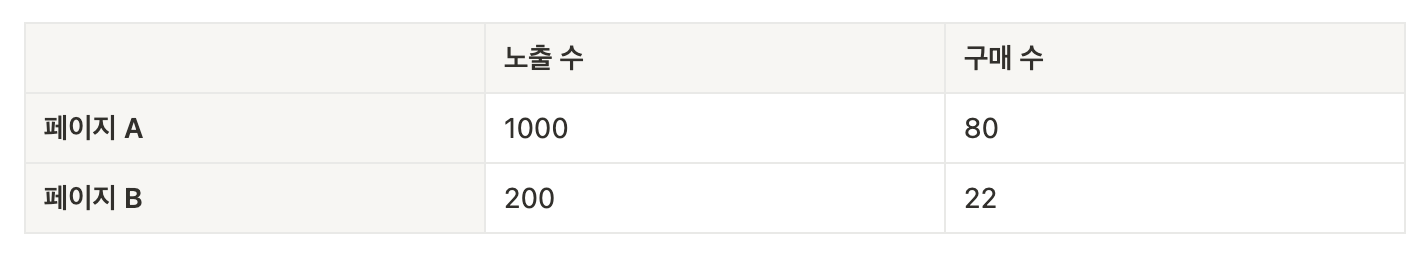

## **문제9)**

- 결과를 바탕으로 패키지 기획자는 페이지 B의 효과에 대해 어떤 결정을 해야 할지 서술해 주세요.
- Hint) https://abtestguide.com/calc/  를 사용하여 해석해보세요

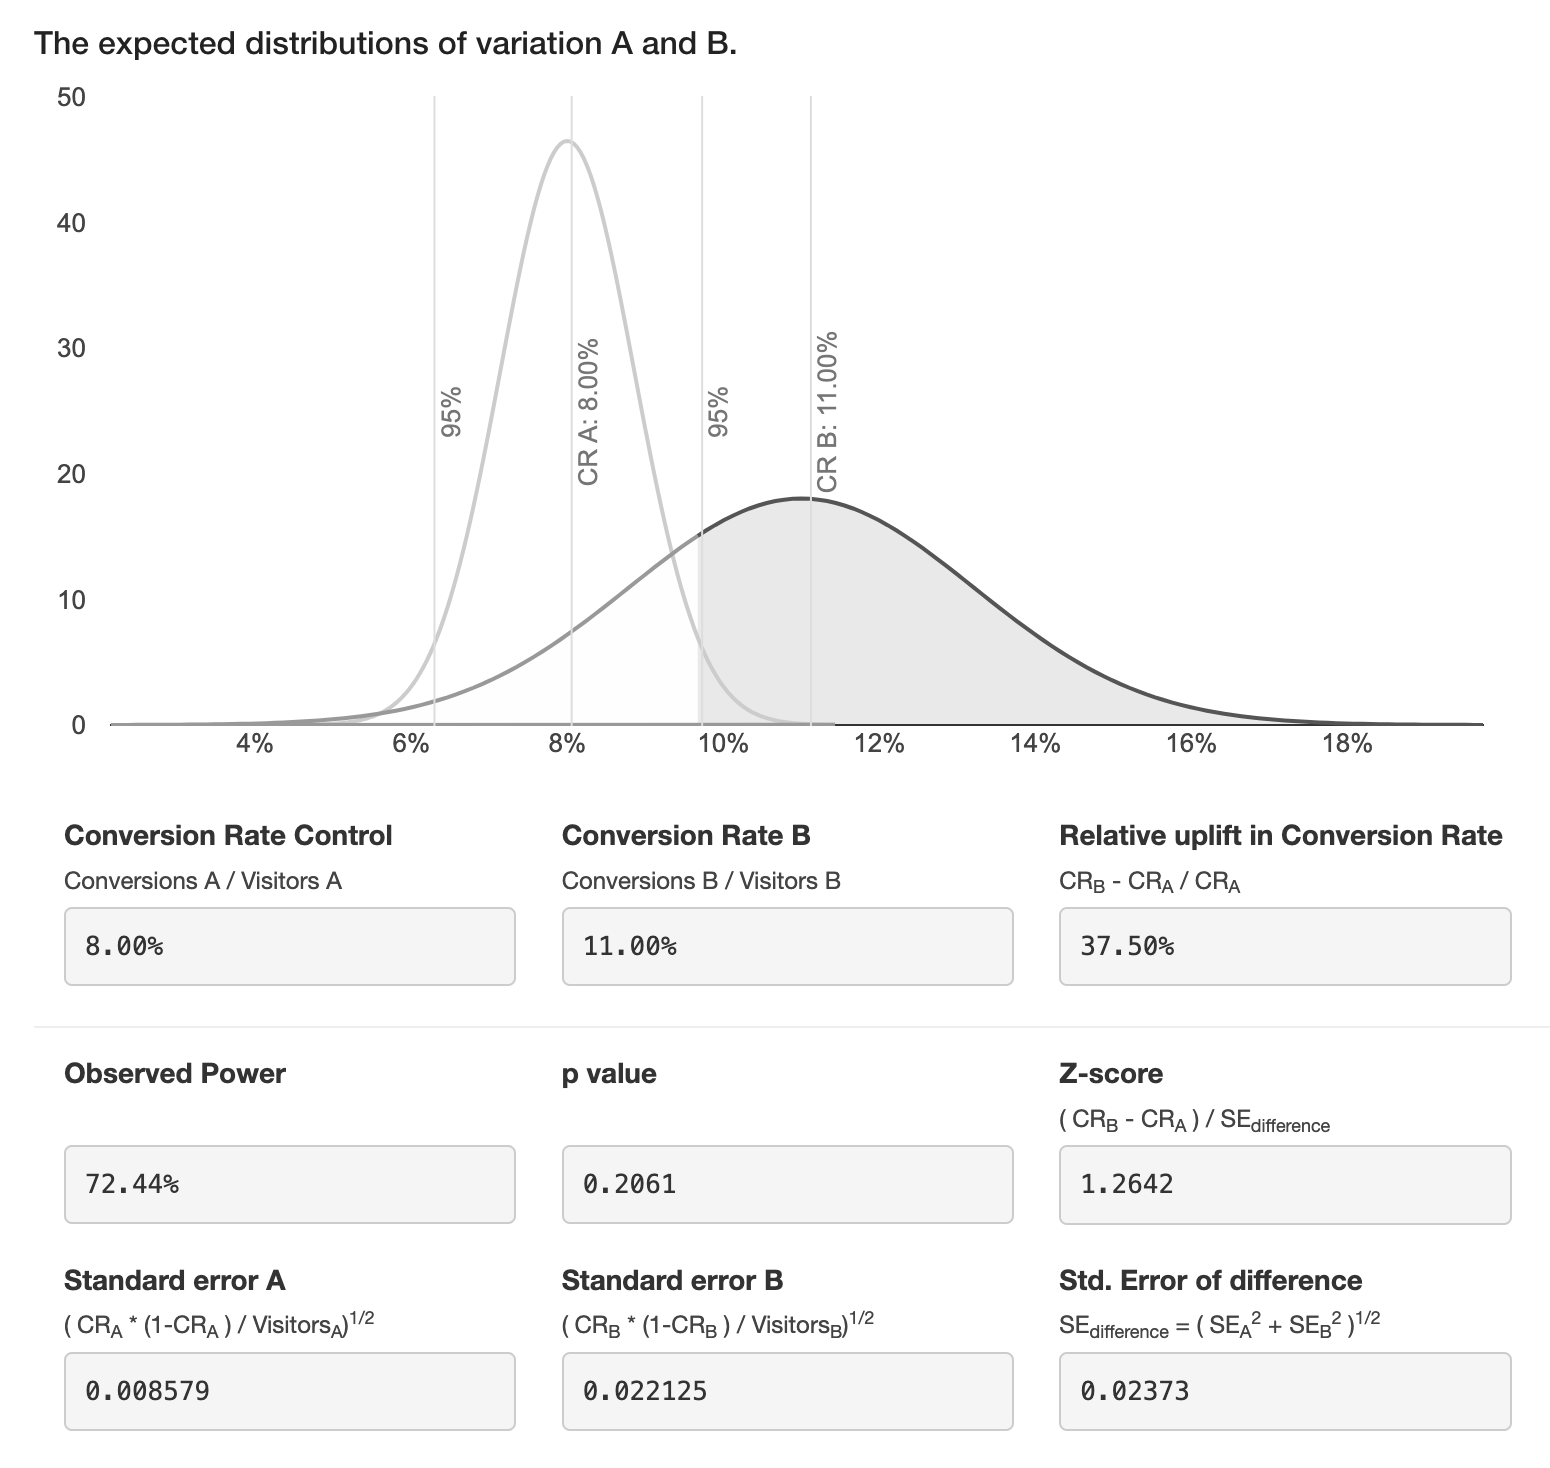

In [ ]:
H₀: 페이지 A와 페이지 B의 판매 효율에는 차이가 없다.
H₁: 페이지 B의 판매 효율이 페이지 A보다 더 높다.

A/B 테스트 결과, 페이지 B의 전환율은 11%로 페이지 A의 8%보다 높게 나타났지만,
p-value가 0.2061로 유의수준 0.05를 초과하였기에 귀무가설을 기각할 수 없다.
즉, 통계적으로 유의한 차이가 있다고 볼 수 없으며, 본 테스트에서는 두 페이지의 판매 효율이 동일하다고 결론내린다.

또한, z-score가 1.2642로 통계적 유의 기준인 1.96을 넘지 못했으며,
검정력(Observed Power) 역시 72.44%로 기준인 80%에 미달한 것으로 보아
표본 수 부족 혹은 효과 크기 부족으로 인해, 본 테스트만으로 명확한 결론을 내리기엔 제한이 있다.

## **문제 10)**

- A/B 테스트의 결과가 통계적으로 유의하나 효과의 차이 자체는 매우 작은 경우, 어떤 의사결정을 할 수 있을지 사례를 통해 설명해 주세요.
- Hint) A/B 관련 자료를 찾아보세요(추천 문헌 [요즘IT](https://yozm.wishket.com/))

In [ ]:
https://yozm.wishket.com/magazine/detail/1034/

베이지안 통계를 추가적으로 진행하여 a/b 테스트로는 확인이 불가능했던 추가적인 인사이트를 파악하고 비지니스 상황 및 전략에 따라 종합적인 의사결정을 내린다.
즉 특정 경향도가 있는 사용자가 집중되는 경우에도 해당 통계적 유의도나 효과가 유지될 수 있을지를 고려해본다.
이와 별도로 비지니스 상황에 맞게 비용 편익 분석, 비지니스 임계값 분석, LTA 분석 등을 고려해 볼 수 있다.

SyntaxError: invalid syntax (<ipython-input-73-5faedb4469e6>, line 1)

In [ ]:
회고
아침에 처음 시작하려고 문제를 봤을 때는 문제도 잘 풀리지 않고 고생을 좀 했는데 갈 수록 어제보다는 수월했던 것 같습니다.
통계 공부할 때 마다 특히 개념 증명하는 것이 너무 어려워서 포기하고는 했는데 빅데이터로는 바로 증명 비슷하게 가능해서 훨씬
공부하는 것이 수월하네요. 강사님 수업도 너무 감사합니다.